Проектная работа по модулю “Математика и статистика в Python”


1.	Загрузить файл hr.csv
2.	Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3.	Рассчитать и визуализировать корреляционную матрицу для переменных
4.	Визуализировать несколько взаимосвязей между переменными
5.	С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6.	Рассчитать сколько работников работает в каждом департаменте
7.	Показать распределение сотрудников по зарплатам
8.	Показать распределение сотрудников по зарплатам совместно с департаментами
9.	Сколько сотрудников покинули компанию
10.	Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11.	Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

In [61]:
#1.Загрузить файл hr.csv
data = pd.read_csv('HR.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#2.Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

In [7]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [8]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

In [10]:
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [11]:
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

In [12]:
#3.Рассчитать и визуализировать корреляционную матрицу для переменных

corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


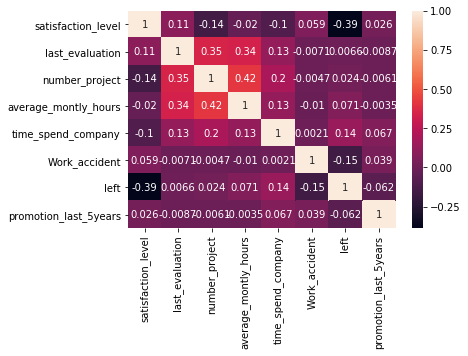

In [13]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

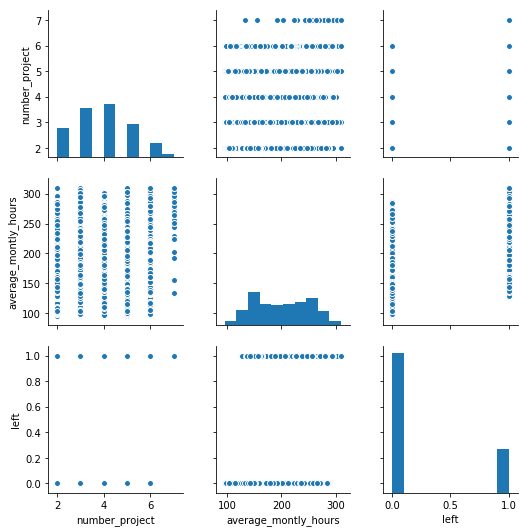

In [25]:
# 4.Визуализировать несколько взаимосвязей между переменными

sns.pairplot(data, vars=['number_project', 'average_montly_hours', 'left'])

In [14]:
# 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными

low_salary = data[data['salary']=='low']['left']
medium_salary = data[data['salary']=='medium']['left']
high_salary = data[data['salary']=='high']['left']

# гипотеза Н0 {решение покинуть компанию не зависит от уровня зарплаты}
# значение P-value оказалось меньше 0.05, поэтому гипотезу отвергаем, уровень зарплаты влияет на решение об уходе.


print(f' T-test между низкой и средней зарплатой: {sts.ttest_ind(low_salary, medium_salary)}')
print(f' T-test между средней и высокой зарплатой: {sts.ttest_ind(medium_salary, high_salary )}')

 T-test между низкой и средней зарплатой: Ttest_indResult(statistic=12.526458011492794, pvalue=8.387113290337173e-36)
 T-test между средней и высокой зарплатой: Ttest_indResult(statistic=11.621154996870466, pvalue=5.836180096189532e-31)


In [15]:
not_promoted = data[data['promotion_last_5years']==0]['left']
promoted = data[data['promotion_last_5years']==1]['left']

# гипотеза Н0 {продвижение по карьерной лестнице не влияет на решение об уходе}
# значение P-value оказалось меньше 0.05, поэтому гипотезу отвергаем, наличие или отсутствие продвижения влияет на решение об уходе.

print(f' T-test между теми, кто продвинулся по карьерной лестнице за последние 5 лет и кто нет: {sts.ttest_ind(not_promoted, promoted)}')


 T-test между теми, кто продвинулся по карьерной лестнице за последние 5 лет и кто нет: Ttest_indResult(statistic=7.581195349367636, pvalue=3.6240472241469694e-14)


In [62]:
# 6.Рассчитать сколько работников работает в каждом департаменте
# UPDATE: посчитаем только оставшихся 

data[data['left']==0]['sales'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64

In [17]:
# 7.Показать распределение сотрудников по зарплатам

salary_distr = data['salary'].value_counts()/data['salary'].count()

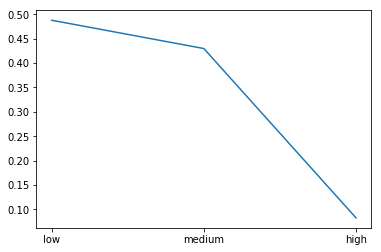

In [18]:
plt.plot(salary_distr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a283529e8>,
      dtype=object)

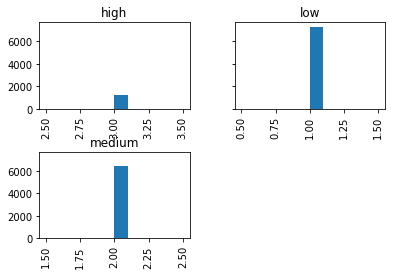

In [164]:
# UPDATE 2: не нравится через hist :( 

data.hist(by = 'salary', column= 'salary_code', sharey= True)

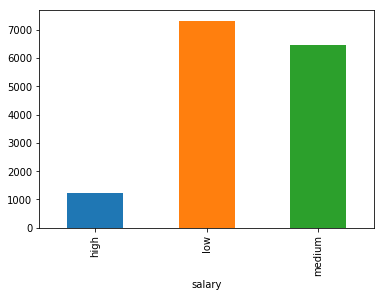

In [165]:
# UPDATE 3: вот теперь Ок

dep_sal = data.groupby(['salary'])['salary'].count()
dep_sal.plot(kind = 'bar')

In [102]:
# 8.Показать распределение сотрудников по зарплатам совместно с департаментами

In [129]:
deps_salary = data.groupby('sales')['salary'].value_counts()/data.groupby('sales')['salary'].count()

In [130]:
deps_salary

sales        salary
IT           low       0.496333
             medium    0.436023
             high      0.067645
RandD        medium    0.472681
             low       0.462516
             high      0.064803
accounting   low       0.466754
             medium    0.436767
             high      0.096480
hr           medium    0.485792
             low       0.453315
             high      0.060893
management   high      0.357143
             medium    0.357143
             low       0.285714
marketing    low       0.468531
             medium    0.438228
             high      0.093240
product_mng  low       0.500000
             medium    0.424612
             high      0.075388
sales        low       0.507005
             medium    0.428019
             high      0.064976
support      low       0.514132
             medium    0.422611
             high      0.063257
technical    low       0.504412
             medium    0.421691
             high      0.073897
Name: salary, dtype:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c87f390>,
      dtype=object)

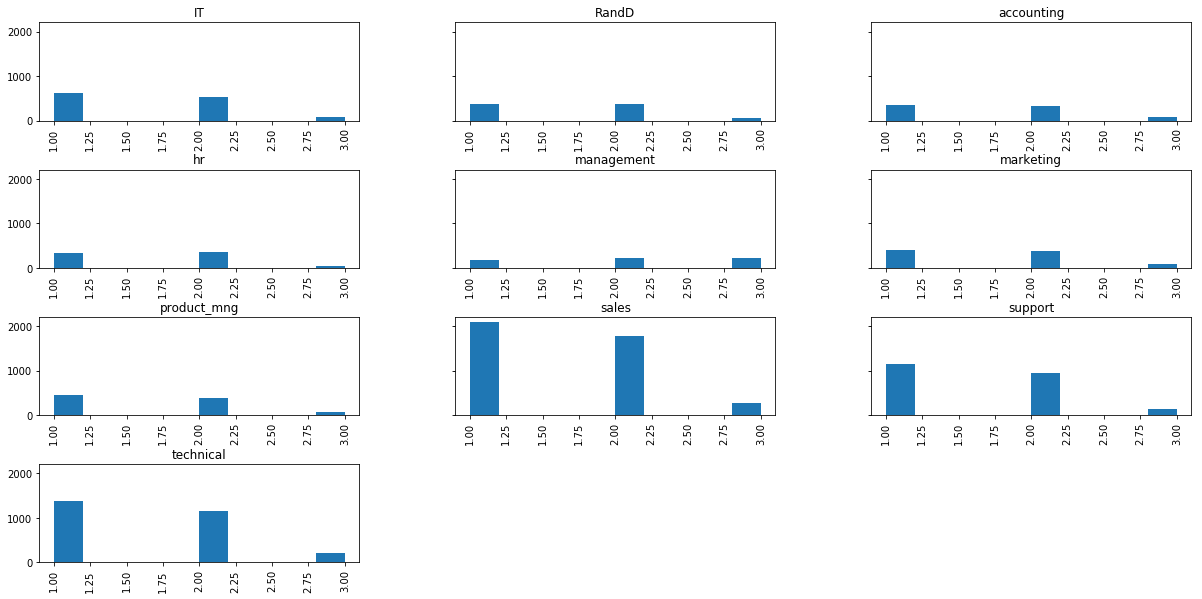

In [149]:
# UPDATE 2: не нравится через hist :( 

data.hist(by = 'sales', column= 'salary_code', sharey= True, figsize=(20,10))

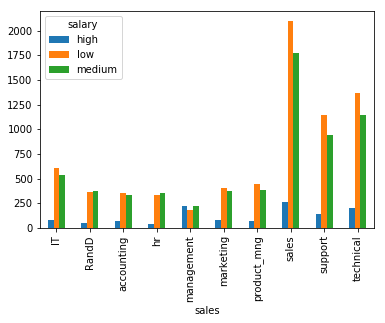

In [173]:
# UPDATE 3: теперь норм :)

ct = pd.crosstab([data.sales], data['salary'])
ct.plot(kind='bar')

In [149]:
# 9.Сколько сотрудников покинули компанию

data.left.sum()

3571

In [150]:
# 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [178]:
# Н1 - сотрудники не задерживаются в компании дольше определенного срока

H1_time = data.groupby('time_spend_company').left.sum()/data.groupby('time_spend_company').left.count()

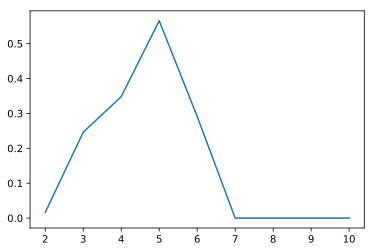

In [179]:
plt.plot(H1_time)

# похоже, что в компании есть переломный срок работы - 5 лет, на этом рубеде более половины решает покинуть компанию. 

In [224]:
# узнаем, что проихсодит в группе тех, кто отработал 5 лет, сравним 2 группы - кто ушел и кто не ушел

years_5_left = data[(data['time_spend_company']==5) & (data['left']==1)]
years_5_stay = data[(data['time_spend_company']==5) & (data['left']==0)]

In [225]:
years_5_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,833.000000,833.000000,833.000000,833.000000,833.0,833.000000,833.0,833.000000
mean,0.714034,0.901032,4.759904,246.337335,5.0,0.046819,1.0,0.001200
std,0.247469,0.094674,0.890644,28.917992,0.0,0.211377,0.0,0.034648
min,0.090000,0.460000,2.000000,132.000000,5.0,0.000000,1.0,0.000000
25%,0.740000,0.860000,4.000000,233.000000,5.0,0.000000,1.0,0.000000
50%,0.810000,0.920000,5.000000,248.000000,5.0,0.000000,1.0,0.000000
75%,0.860000,0.970000,5.000000,262.000000,5.0,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,5.0,1.000000,1.0,1.000000


In [226]:
years_5_stay.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,640.000000,640.000000,640.000000,640.000000,640.0,640.000000,640.0,640.000000
mean,0.475297,0.699953,4.206250,192.576562,5.0,0.206250,0.0,0.025000
std,0.273670,0.176730,1.221082,51.190800,0.0,0.404929,0.0,0.156247
min,0.120000,0.360000,2.000000,98.000000,5.0,0.000000,0.0,0.000000
25%,0.210000,0.560000,3.000000,152.000000,5.0,0.000000,0.0,0.000000
50%,0.435000,0.700000,4.000000,191.000000,5.0,0.000000,0.0,0.000000
75%,0.712500,0.850000,5.000000,237.000000,5.0,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,5.0,1.000000,0.0,1.000000


(array([0.1556178 , 0.20008003, 0.31123561, 0.06669334, 0.13338669,
        0.22231115, 1.53394691, 5.11315637, 4.06829398, 6.71379663]),
 array([0.46 , 0.514, 0.568, 0.622, 0.676, 0.73 , 0.784, 0.838, 0.892,
        0.946, 1.   ]),
 <a list of 1 Patch objects>)

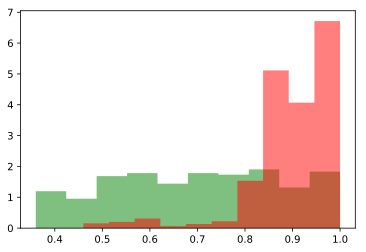

In [227]:
# у тех, кто решил уйти, очень высокие оценки по сравнению с теми, кто остался

plt.hist(years_5_stay.last_evaluation, density = True,histtype='stepfilled', alpha = 0.5, color = 'g')
plt.hist(years_5_left.last_evaluation, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

(array([0.00101164, 0.00107908, 0.00060698, 0.00013489, 0.00209072,
        0.01375831, 0.01659091, 0.01490484, 0.00337214, 0.00263027]),
 array([132. , 149.8, 167.6, 185.4, 203.2, 221. , 238.8, 256.6, 274.4,
        292.2, 310. ]),
 <a list of 1 Patch objects>)

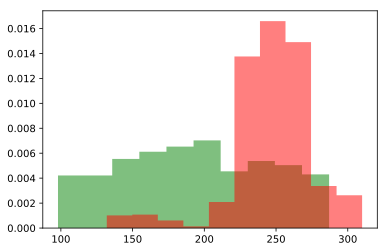

In [228]:
# при этом уходящие значительно больше работали

plt.hist(years_5_stay.average_montly_hours, density = True,histtype='stepfilled', alpha = 0.5, color = 'g')
plt.hist(years_5_left.average_montly_hours, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

(array([9.53181273, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.46818727]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

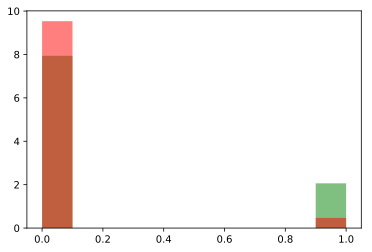

In [229]:
# и больше сталкивались с проишествиями 

plt.hist(years_5_stay.Work_accident, density = True,histtype='stepfilled', alpha = 0.5, color = 'g')
plt.hist(years_5_left.Work_accident, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

(array([9.9879952, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.0120048]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 1 Patch objects>)

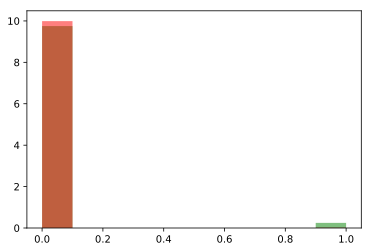

In [234]:
# и при этом очень редко получали повышение

plt.hist(years_5_stay.promotion_last_5years, density = True,histtype='stepfilled', alpha = 0.5, color = 'g')
plt.hist(years_5_left.promotion_last_5years, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

In [236]:
# резюме: по прошествии 5 лет амбициозные наиболее профессиональные кадры при отсутствии роста принимают решение покинуть компанию.
# более привязанными к компании оказываются те, чьи оценки средние и у кого меньшее количество рабочих часов, 
# они сталкиваются с меньшим количеством проишествий и чаще получают повышение

In [250]:
# проверим тех, кто решил уйти, не проработав 3х лет
below_3_left = data[(data['time_spend_company']<=3) & (data['left']==1)]
below_3_stay = data[(data['time_spend_company']<=3) & (data['left']==0)]

In [251]:
below_3_left.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.000000,1639.0,1639.000000
mean,0.415296,0.527559,2.161074,149.427090,2.967663,0.045760,1.0,0.009152
std,0.075052,0.080868,0.688062,26.535012,0.176947,0.209027,0.0,0.095256
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.380000,0.480000,2.000000,135.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.510000,2.000000,145.000000,3.000000,0.000000,1.0,0.000000
75%,0.440000,0.550000,2.000000,154.000000,3.000000,0.000000,1.0,0.000000
max,0.900000,1.000000,7.000000,310.000000,3.000000,1.000000,1.0,1.000000


In [252]:
below_3_stay.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.000000,8048.0,8048.000000
mean,0.697812,0.717169,3.710363,199.651715,2.603504,0.171223,0.0,0.021496
std,0.187146,0.158540,0.909463,44.181001,0.489200,0.376727,0.0,0.145040
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.570000,0.590000,3.000000,163.000000,2.000000,0.000000,0.0,0.000000
50%,0.710000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.850000,0.850000,4.000000,238.000000,3.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,3.000000,1.000000,0.0,1.000000


(array([7.79854679, 6.66703644, 2.695657  , 0.12202563, 0.16639858,
        0.1442121 , 0.16639858, 0.15530534, 0.09983915, 0.16639858]),
 array([0.45 , 0.505, 0.56 , 0.615, 0.67 , 0.725, 0.78 , 0.835, 0.89 ,
        0.945, 1.   ]),
 <a list of 1 Patch objects>)

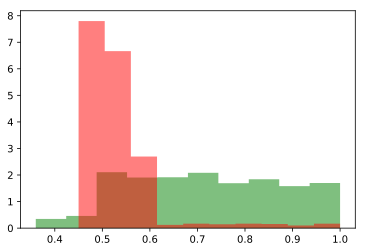

In [253]:
plt.hist(below_3_stay.last_evaluation, density = True,histtype='stepfilled', alpha = 0.5, color = 'g')
plt.hist(below_3_left.last_evaluation, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

In [ ]:
# в первые годы ушли те, у кого были преимущественно низкие оценки

(array([0.02599676, 0.02496883, 0.00049739, 0.00033159, 0.00036475,
        0.00033159, 0.00063002, 0.00043107, 0.00029843, 0.00049739]),
 array([126. , 144.4, 162.8, 181.2, 199.6, 218. , 236.4, 254.8, 273.2,
        291.6, 310. ]),
 <a list of 1 Patch objects>)

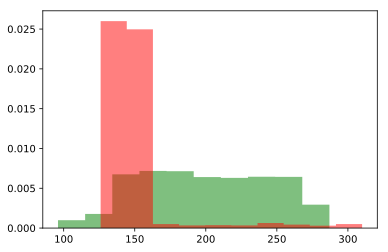

In [254]:
plt.hist(below_3_stay.average_montly_hours, density = True,histtype='stepfilled', alpha = 0.5, color = 'g')
plt.hist(below_3_left.average_montly_hours, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

(array([0.12051914, 0.03766223, 0.12805158, 6.59842271, 4.97141437,
        0.10545424, 0.09038935, 0.07532446, 0.15064892, 0.06779201]),
 array([0.09 , 0.171, 0.252, 0.333, 0.414, 0.495, 0.576, 0.657, 0.738,
        0.819, 0.9  ]),
 <a list of 1 Patch objects>)

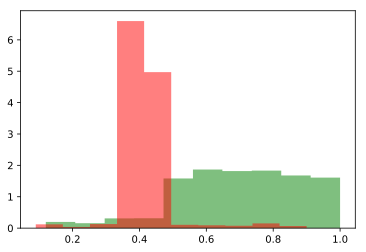

In [255]:
# а также небольшое количество частов работы

plt.hist(below_3_stay.satisfaction_level, density = True,histtype='stepfilled', alpha = 0.5, color = 'g')
plt.hist(below_3_left.satisfaction_level, density = True, histtype = 'stepfilled', alpha=0.5, color = 'r')

In [268]:
below_3_left.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.305759,0.122973,0.266816,-0.259245,0.004001,NaN,0.111916
last_evaluation,0.305759,1.000000,0.574867,0.509453,-0.510241,-0.023005,NaN,-0.008194
number_project,0.122973,0.574867,1.000000,0.567985,-0.503758,-0.025811,NaN,0.033383
average_montly_hours,0.266816,0.509453,0.567985,1.000000,-0.422756,-0.013432,NaN,0.000385
time_spend_company,-0.259245,-0.510241,-0.503758,-0.422756,1.000000,0.023525,NaN,0.017569
Work_accident,0.004001,-0.023005,-0.025811,-0.013432,0.023525,1.000000,NaN,0.070938
left,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
promotion_last_5years,0.111916,-0.008194,0.033383,0.000385,0.017569,0.070938,NaN,1.000000


In [ ]:
# получается, причина ухода до 3-х лет - двухстороннее недовольство: компания низко оценивала результаты работы сотрудников,
# давала не полную загрузку, что в совокупности негативно сказывалось на удовлетворенности сотрудников

In [ ]:
data.hist(figsize = [20,15])